#**Marketing Campaign Optimization**
---
#Context
---

* The superstore wants to predict the likelihood of the customer giving a

*   List item
*   List item

positive response and wants to identify the different factors which affect the customer's response.

*  Analyzed the data provided to identify these factors and will build a prediction model to predict the probability of a customer giving a positive response.

---
#Dataset:
---

* **Response (target) -** 1 if customer accepted the offer in the last campaign, 0 otherwise.
* **ID -** Unique ID of each customer.
* **Year_Birth -** Age of the customer.
* **Complain -** 1 if the customer complained in the last 2 years.
* **Dt_Customer -** date of customer's enrollment with the company.
* **Education -** customer's level of education.
* **Marital -** customer's marital status.
* **Kidhome -** number of small children in customer's household.
* **Teenhome -** number of teenagers in customer's household.
* **Income -** customer's yearly household income.
* **MntFishProducts -** the amount spent on fish products in the last 2 years.
* **MntMeatProducts -** the amount spent on meat products in the last 2 years.
* **MntFruits -** the amount spent on fruits products in the last 2 years.
* **MntSweetProducts -** amount spent on sweet products in the last 2 years.
* **MntWines -** the amount spent on wine products in the last 2 years.
* **MntGoldProds -** the amount spent on gold products in the last 2 years.
* **NumDealsPurchases -** number of purchases made with discount.
* **NumCatalogPurchases -** number of purchases made using catalog (buying goods to be shipped through the mail).
* **NumStorePurchases -** number of purchases made directly in stores.
* **NumWebPurchases -** number of purchases made through the company's website.
* **NumWebVisitsMonth -** number of visits to company's website in the last month.
* **Recency -** number of days since the last purchase.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
from scipy import stats
from sklearn import model_selection
import seaborn as sns

#train test split
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score, f1_score, recall_score
#from  sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


from sklearn.utils import resample
#from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score , classification_report
from imblearn.over_sampling import SMOTE


#feature importance
from sklearn.inspection import permutation_importance



# Reading the dataset

In [ ]:
import requests
from io import StringIO
orig_url="https://drive.google.com/file/d/18IpirbfCoxNK80bZYqcuMOVKVxGJnEiV/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)

# Understanding the data

In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations:**

*   There are 2240 observations and 21 columns.
*   Income column has missing values in the data



**Checking for null values in each column.**

In [ ]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
#removing null values
df=df.dropna(subset=["Income"])
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

**Identifying the Number of Unique values in each Column**

In [ ]:
df.nunique()

Id                     2216
Year_Birth               59
Education                 5
Marital_Status            5
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
Response                  2
Complain                  2
dtype: int64

# Univariate analysis of numerical columns

In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.009477
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.096907
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


**Observations**\
**The average time since the last purchase is 49 days**, indicating a decline in purchases over the past two months.\
**The most significant expenditure is on wines**, surpassing spending on other items.\
**The majority of purchases are made in-store**, with online purchases coming in a close second.\
**There seems to be a presence of outliers in number of purchases made**, suggested by the notable difference between the 75th percentile and the maximum value in each mode of purchase.



# Total amount spent and total number of orders.

Two new columns have been added: total_amount and num_purchases.

- **total_amount**: This column represents the sum of expenditures across various categories including fish products, meat products, fruits, sweet products, wines, and gold products.

- **num_purchases**: This column indicates the total number of purchases made across different channels, encompassing catalog purchases, in-store purchases, and online purchases.


In [ ]:
df['total_amount']=df[['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds']].sum(axis=1)

In [ ]:
df['num_purchases']=df[['NumCatalogPurchases','NumStorePurchases','NumWebPurchases']].sum(axis=1)

In [ ]:
df[['num_purchases','total_amount']].describe()

,num_purchases,total_amount
count,2216.000000,2216.000000
mean,12.557310,607.075361
std,7.204611,602.900476
min,0.000000,5.000000
25%,6.000000,69.000000
50%,12.000000,396.500000
75%,18.000000,1048.000000
max,32.000000,2525.000000


**Observations**\
The average amount spent per purchase stands at $50. Given that the average recency is 49 days, enhancing strategies to boost the average purchase amount could offset the impact of the relatively long average recency.

We identified a data inconsistency where the minimum number of purchases is zero, yet the corresponding total spending isn't zero. As this is unlikely in practice, we're removing these rows to ensure data accuracy.




In [ ]:
condition = (df['num_purchases'] == 0) & (df['total_amount'] != 0)
df = df.drop(df[condition].index)
df[['num_purchases','total_amount']].describe()

,num_purchases,total_amount
count,2210.000000,2210.000000
mean,12.591403,608.704525
std,7.184563,602.905925
min,1.000000,8.000000
25%,6.000000,69.000000
50%,12.000000,397.500000
75%,18.750000,1048.750000
max,32.000000,2525.000000


# Mean of each variable relative to values of Response

In [ ]:
#Mean of numerical variables grouped by Churn
num_cols = ['Income','Recency', 'NumWebVisitsMonth','total_amount','num_purchases']
print("Mean of numerical variables grouped by 'Response':")
means=df.groupby('Response')[num_cols].mean()
means=pd.DataFrame(means)

Mean of numerical variables grouped by 'Response':


In [ ]:
cm = sns.light_palette("lightblue", as_cmap=True)
means.style.background_gradient(cmap=cm)

,Income,Recency,NumWebVisitsMonth,total_amount,num_purchases
Response,,,,,
0,50828.515184,51.429409,5.302611,541.828450,12.101225
1,60209.675676,35.264264,5.306306,985.660661,15.354354




*   Customers who responded positively to the previous campaign tend to have higher income, visit the website more frequently, and spend more money with a greater number of purchases. This reflects real-world consumer behavior where engaged customers are typically more valuable.
*   Customers who did not respond positively in the past campaign show higher recency. This aligns with real-life scenarios where inactive customers tend to have less frequent interactions.

# Univariate analysis of Categorical columns

In [ ]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2210,2210,2210
unique,5,5,662
top,Graduation,Married,8/31/2012
freq,1112,855,12


**Observations**\
Majority of the Customers are Graduates, with a frequency of 1116.\
Majority of the Customers are Married, with a frequency of 857.




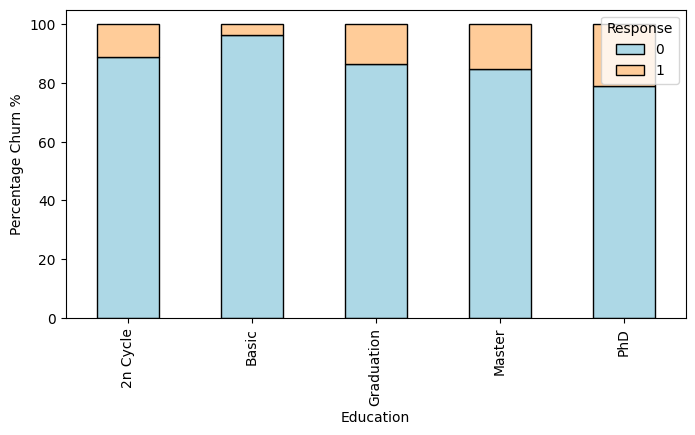

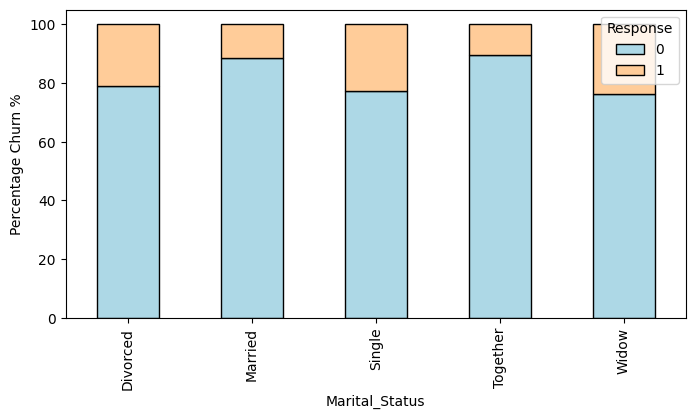

In [ ]:
cat_cols = ["Education","Marital_Status"]
for i in cat_cols:
    if i != 'Response':
        (pd.crosstab(df[i], df['Response'], normalize='index') * 100).plot(kind='bar', figsize=(8, 4), stacked=True,color=['lightblue', '#ffcc99'],edgecolor='black')
        plt.ylabel('Percentage Churn %')
        plt.show()

**The percentege of people complained using a Pie Chart**

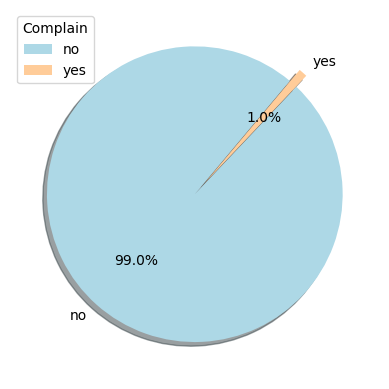

In [ ]:
plt.pie(df['Complain'].value_counts(),labels=['no','yes'],autopct='%1.1f%%',shadow=True, startangle=50,explode=(0, 0.1),colors = ['lightblue', '#ffcc99']
)

plt.legend(title = "Complain")
plt.show()




*   There are very few complains which is good for the store.



**Response Distribution using a Pie Chart.**

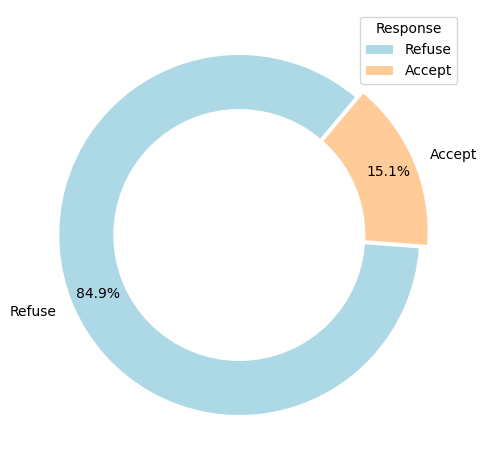

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.00,0.05)
labels = ['Refuse','Accept']
plt.pie(df['Response'].value_counts(), colors = ['lightblue', '#ffcc99'], labels=labels, autopct='%1.1f%%', startangle=50, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(title = "Response")
plt.tight_layout()
plt.show()

*   This plot shows a clear sign of imbalance in the data.


# Converting date formatted features to more interpretable formats.

In [ ]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y').dt.year
df['age'] = pd.Timestamp.now().year - df['Year_Birth']
df.age.head()

0    54
1    63
2    66
3    57
4    35
Name: age, dtype: int32

**Converting Object datatype to DateTime format.**

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed', dayfirst=True)
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Index: 2210 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2210 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.5 KB


**Extracting number of days since the customers enrollement with the company.**



In [ ]:
df['Dt_days']= (datetime.datetime.now() - df['Dt_Customer']).dt.days

## Dropping the Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2210, 26)

# Graphical analysis of predictor variables

**Classified predictor variables into 4 categories**

In [ ]:
Demographics=['Education','Marital_Status','age','Income','Kidhome','Teenhome']
Mode_of_Purchase=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
Purchases=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
Engangement_metrics=['NumWebVisitsMonth','Complain','Recency','Dt_days']

**Demographics**

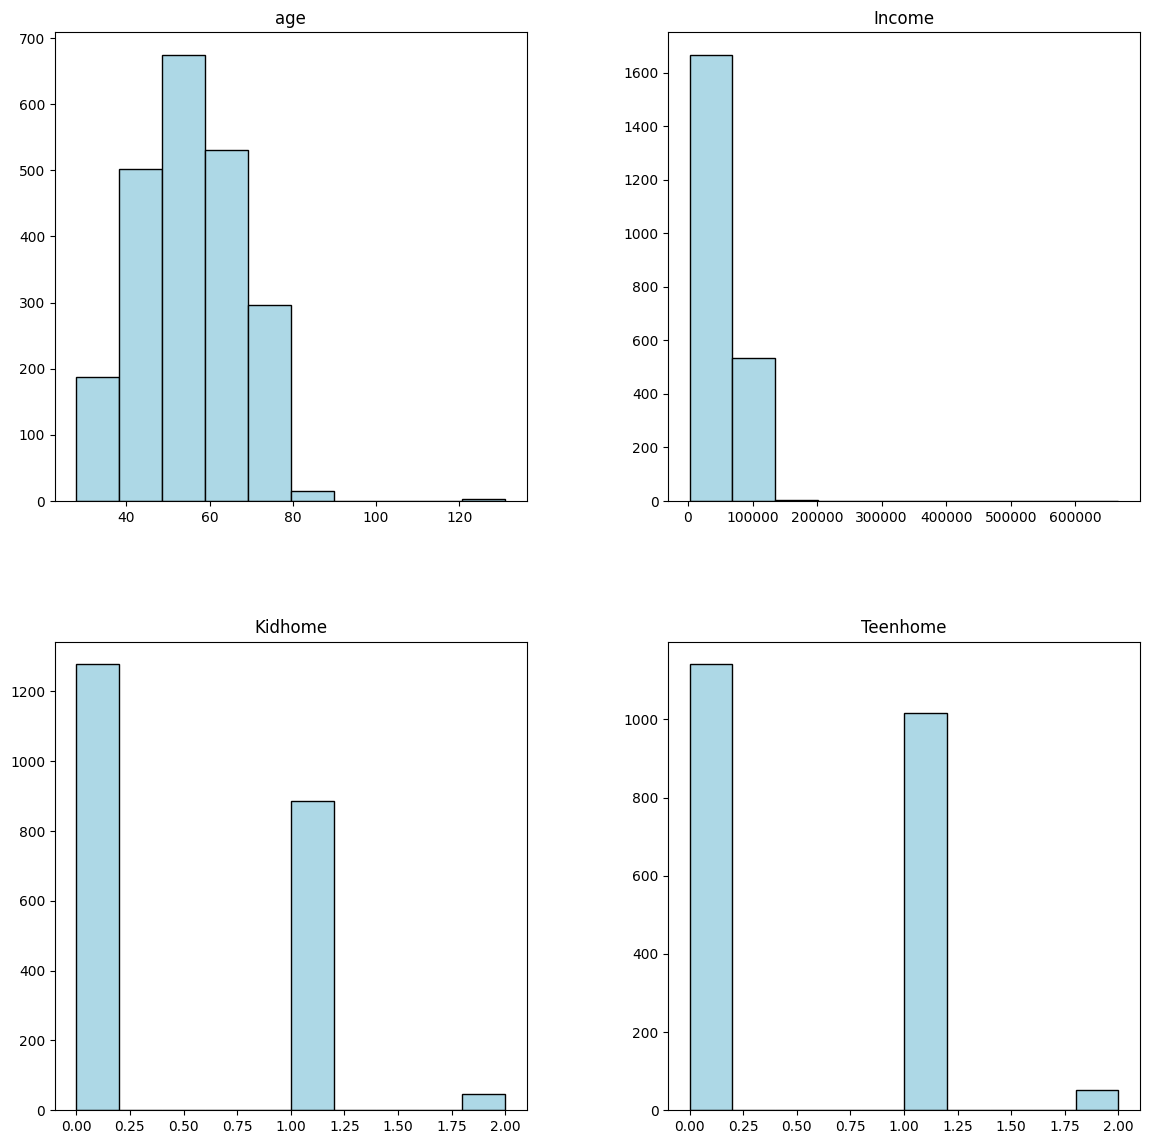

In [ ]:
df[Demographics].hist(figsize=(14,14),grid=False, color = 'lightblue', edgecolor='black')
plt.show()

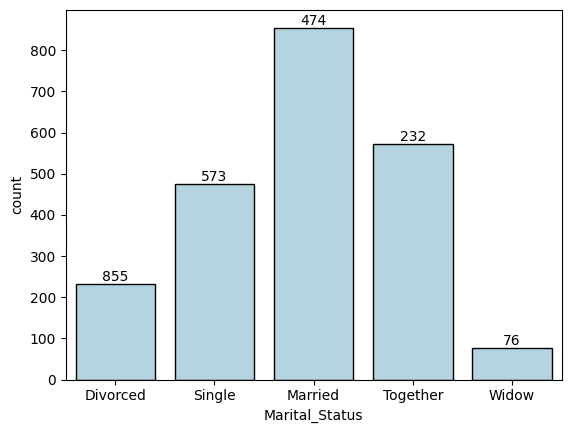

In [ ]:
ms=sns.countplot(x='Marital_Status', data=df,color = 'lightblue', edgecolor='black')
abs_values=df['Marital_Status'].value_counts().values
ms.bar_label(container=ms.containers[0],labels=abs_values)
plt.show()

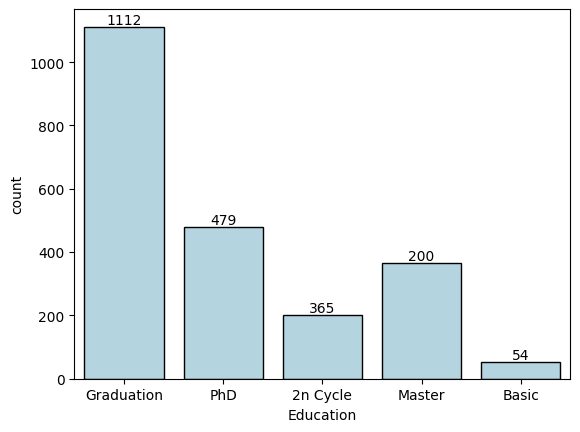

In [ ]:
education=sns.countplot(x='Education', data=df,color = 'lightblue', edgecolor='black')
abs_values=df['Education'].value_counts().values
education.bar_label(container=education.containers[0],labels=abs_values)
plt.show()

**Mode of Purchase**

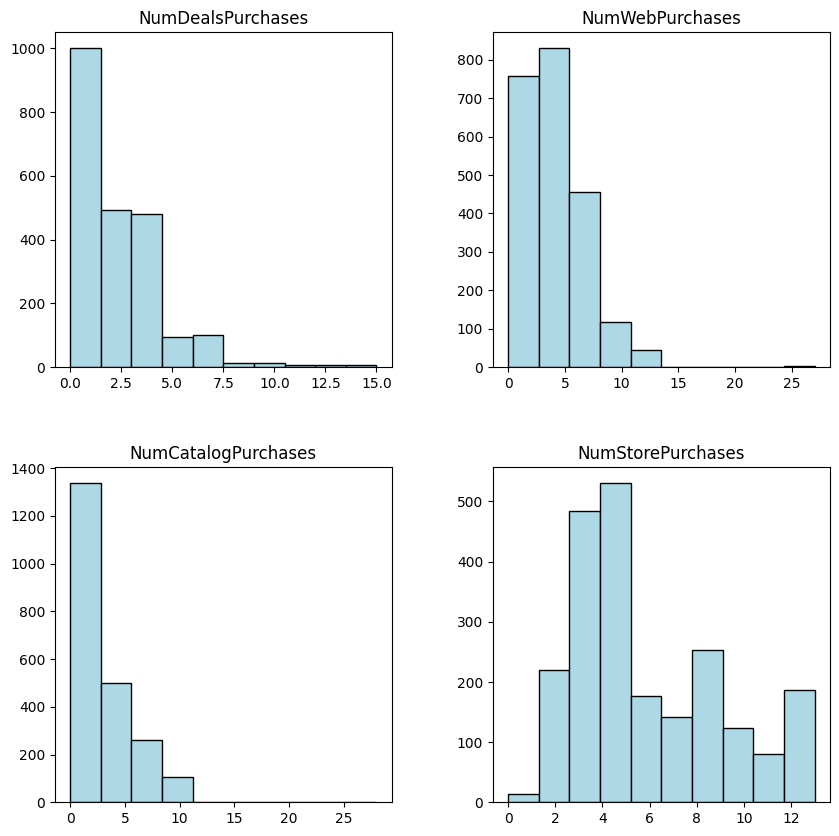

In [ ]:
df[Mode_of_Purchase].hist(figsize=(10,10),grid=False,color = 'lightblue', edgecolor='black')
plt.show()

**Purchases**

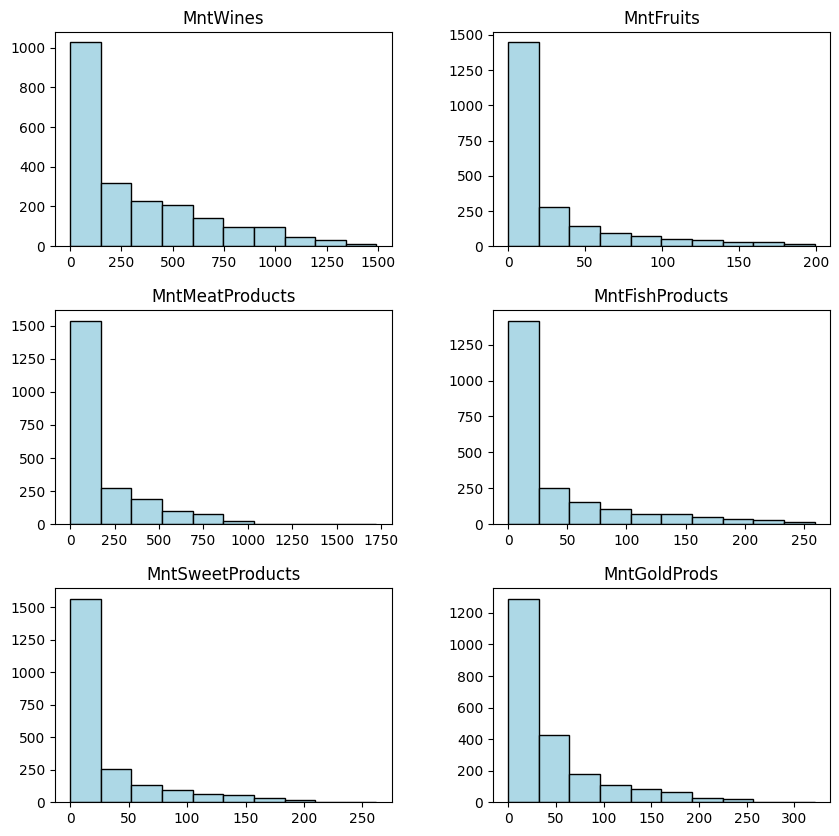

In [ ]:
df[Purchases].hist(figsize=(10,10),grid=False,color = 'lightblue', edgecolor='black')
plt.show()



*   Histograms indicated that the data exhibits right skewness.
*   Data scaling is necessary to mitigate the influence of extreme values and improve the normality of the distribution for further analyses.






**Engangement metrics**

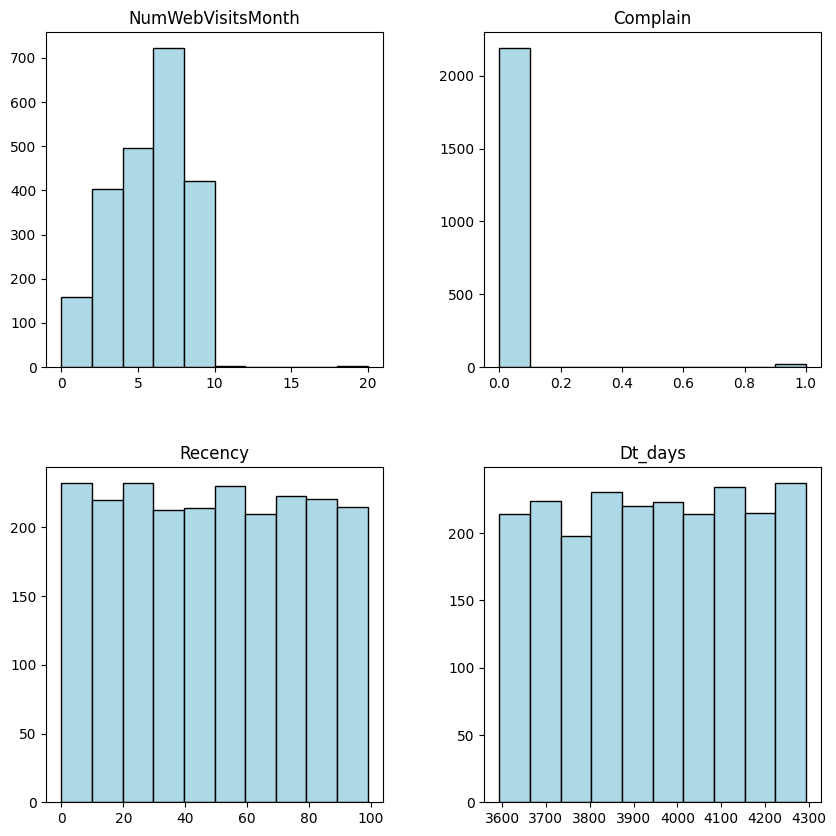

In [ ]:
df[Engangement_metrics].hist(figsize=(10,10),grid=False,color = 'lightblue', edgecolor='black')
plt.show()

# Removing unnecessary columns

*   Removing unnecessary columns based on the the domain knowledge.




In [ ]:
superstore = df.drop(columns=['Year_Birth','Dt_Customer'])
Target_Variable=df[['Response']]

# Correlation Matrix

In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2210 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2210 non-null   int64  
 1   Education            2210 non-null   object 
 2   Marital_Status       2210 non-null   object 
 3   Income               2210 non-null   float64
 4   Kidhome              2210 non-null   int64  
 5   Teenhome             2210 non-null   int64  
 6   Recency              2210 non-null   int64  
 7   MntWines             2210 non-null   int64  
 8   MntFruits            2210 non-null   int64  
 9   MntMeatProducts      2210 non-null   int64  
 10  MntFishProducts      2210 non-null   int64  
 11  MntSweetProducts     2210 non-null   int64  
 12  MntGoldProds         2210 non-null   int64  
 13  NumDealsPurchases    2210 non-null   int64  
 14  NumWebPurchases      2210 non-null   int64  
 15  NumCatalogPurchases  2210 non-null   int64 

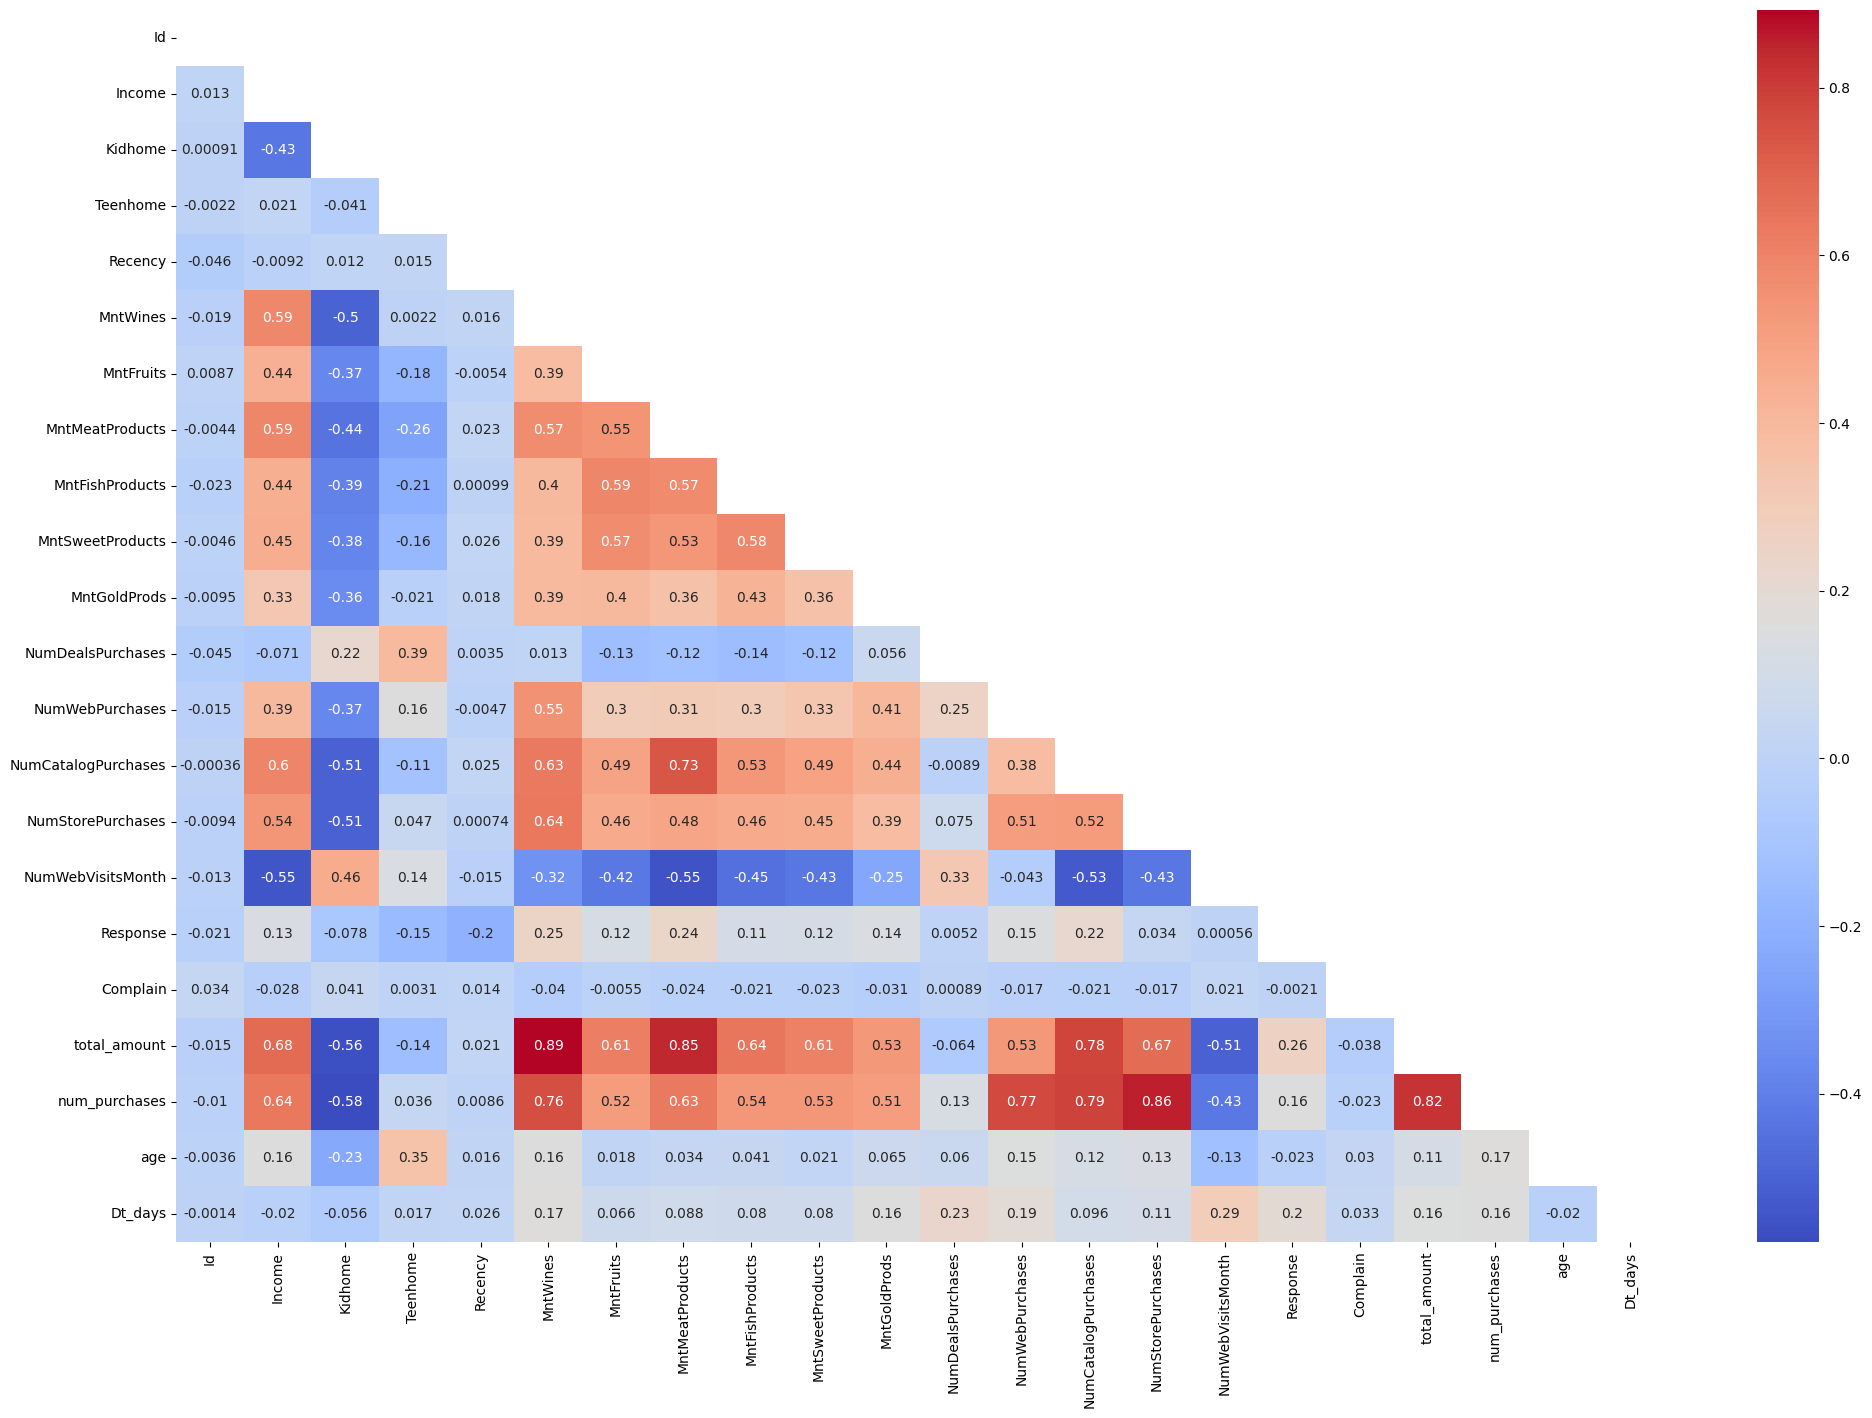

In [ ]:
correlation_matrix=superstore.corr(numeric_only=True)
plt.figure(figsize=(24,16))
mask=np.triu(np.ones_like(correlation_matrix,bool))
cmap = 'coolwarm'
sns.heatmap(correlation_matrix,mask=mask,annot=True,cmap=cmap)
plt.show()

**Observations**:

* Excluded "total_amount" and "num_purchases" from the predictor variables as they were initially created for exploratory data analysis purposes.






 **Removing columns to avoid Multicollinearity.**




In [ ]:
superstore.drop(columns=['Id','total_amount','num_purchases'],inplace=True)

In [ ]:
superstore.corr(numeric_only=True)['Response'].sort_values(ascending=False)

Response               1.000000
MntWines               0.245601
MntMeatProducts        0.237136
NumCatalogPurchases    0.219172
Dt_days                0.195844
NumWebPurchases        0.150219
MntGoldProds           0.139549
Income                 0.134651
MntFruits              0.121808
MntSweetProducts       0.115530
MntFishProducts        0.107469
NumStorePurchases      0.034360
NumDealsPurchases      0.005150
NumWebVisitsMonth      0.000558
Complain              -0.002142
age                   -0.023448
Kidhome               -0.078244
Teenhome              -0.154829
Recency               -0.199747
Name: Response, dtype: float64

* **Recency has a negative correlation with the target variable**, as the customer who does not regulary purchases from the store is unlikely to acquire gold membership.
* **Income, total amount spent, number of purchases are positively correlated with the target variable**, the high amount a customer can or will spend there is a higher chance to take the gold membership.

# Creating dummies for Categorical varibales

In [ ]:
#checking uniquie to perfom get_dummies operation
superstore['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [ ]:
superstore['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [ ]:
#creating list for columns that require dummy varibale creation
dummy_columns = ['Education','Marital_Status']

#getting dummy columns
superstore = pd.get_dummies(data= superstore, columns=dummy_columns, drop_first= True)
superstore = superstore.drop(columns='Response')

In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2210 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2210 non-null   float64
 1   Kidhome                  2210 non-null   int64  
 2   Teenhome                 2210 non-null   int64  
 3   Recency                  2210 non-null   int64  
 4   MntWines                 2210 non-null   int64  
 5   MntFruits                2210 non-null   int64  
 6   MntMeatProducts          2210 non-null   int64  
 7   MntFishProducts          2210 non-null   int64  
 8   MntSweetProducts         2210 non-null   int64  
 9   MntGoldProds             2210 non-null   int64  
 10  NumDealsPurchases        2210 non-null   int64  
 11  NumWebPurchases          2210 non-null   int64  
 12  NumCatalogPurchases      2210 non-null   int64  
 13  NumStorePurchases        2210 non-null   int64  
 14  NumWebVisitsMonth        2210

# Scatterplot to indentify outliers in Predicting variables.

In [ ]:
list_boxplots = ['Income','Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','age']

In [ ]:
zscore_ss = stats.zscore(superstore[list_boxplots])
outliercount={}
for i in zscore_ss:
  outliercount[i]= zscore_ss[zscore_ss[i]>3][i].count() + zscore_ss[zscore_ss[i]<-3][i].count()
  print(f"{i}: {outliercount[i]}")

Income: 6
Recency: 0
MntWines: 15
MntFruits: 64
MntMeatProducts: 39
MntFishProducts: 55
MntSweetProducts: 61
MntGoldProds: 46
NumDealsPurchases: 43
NumWebPurchases: 3
NumCatalogPurchases: 4
NumStorePurchases: 0
NumWebVisitsMonth: 5
age: 3


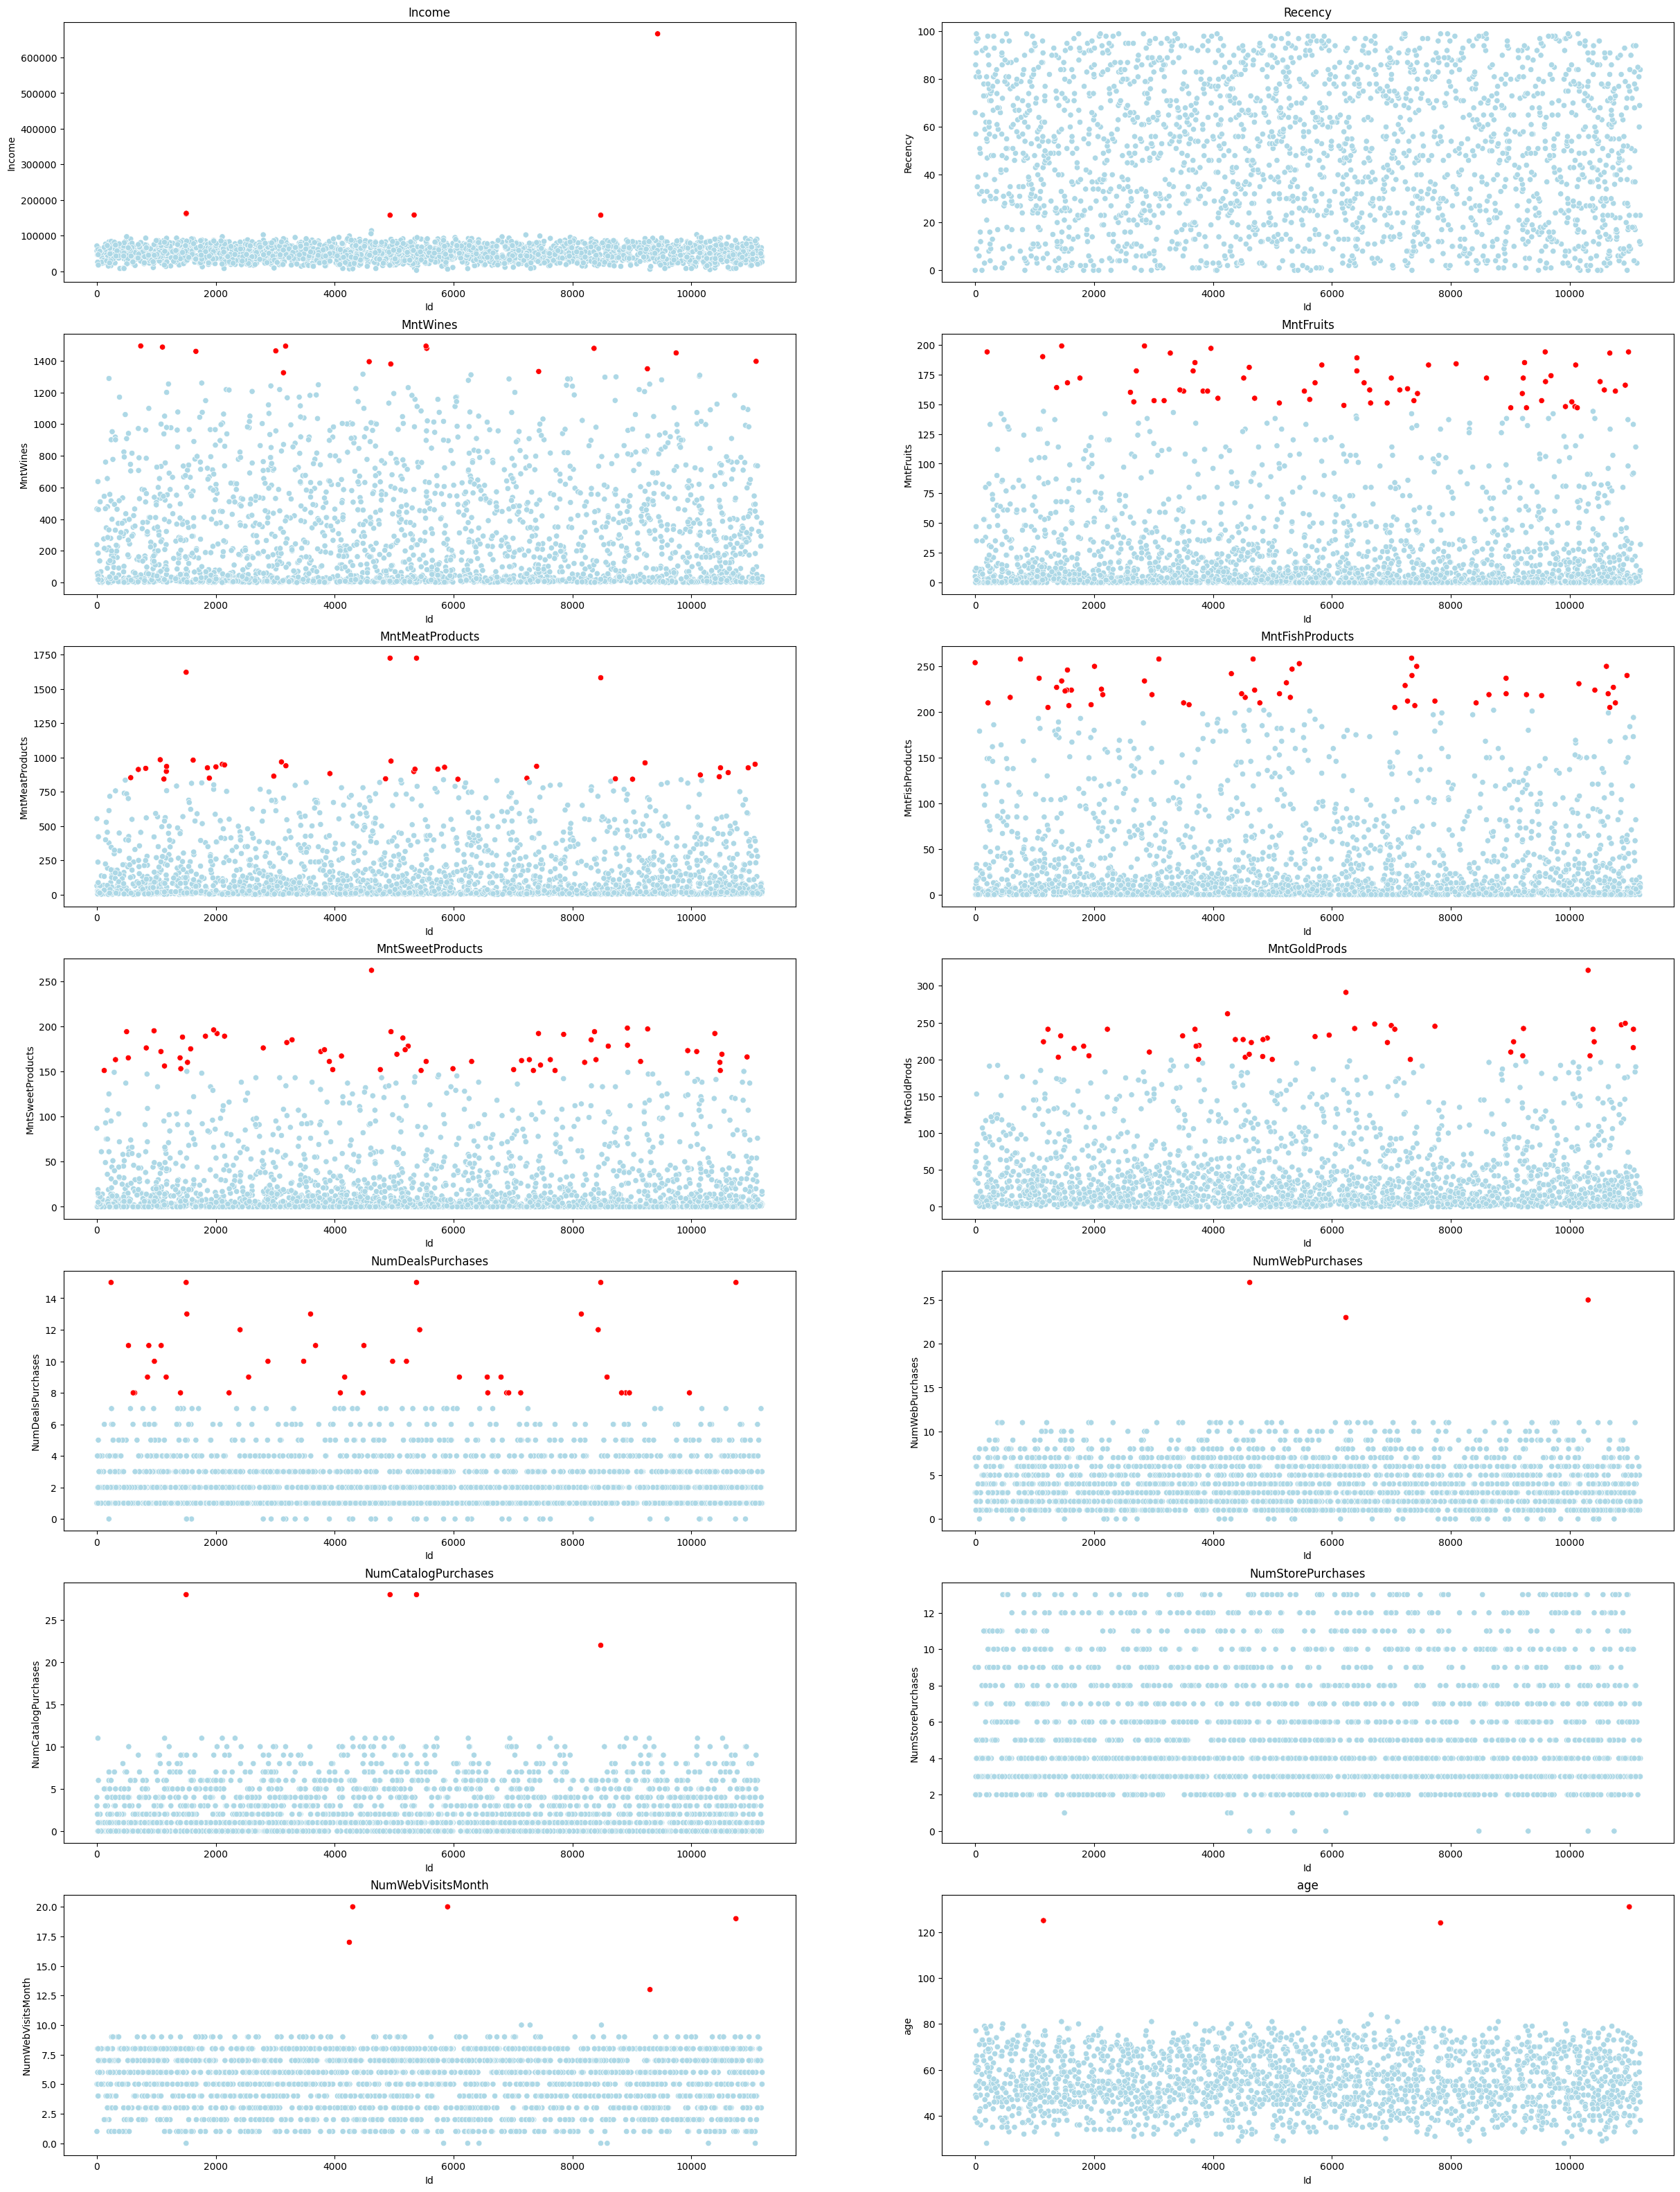

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(30, 40))

cont = 0
color_dict = {True : 'lightblue', False : 'red'}
for i in range(7):
    for j in range(2):
        df['hue'] = zscore_ss[list_boxplots[cont]].between(-3, 3)
        sns.scatterplot(df,x='Id',y=list_boxplots[cont], ax=ax[i][j], hue = 'hue', palette= color_dict, legend=False )
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1

 **Removing Outliers**

In [ ]:
check = zscore_ss < 3
index = check.all(axis=1)
superstore = superstore[index]

In [ ]:
Target_Variable = Target_Variable[index]

In [ ]:
superstore.shape
superstore.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,age,Dt_days
count,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000
mean,49147.712223,0.479629,0.525013,49.132543,271.424446,19.716349,131.807117,28.667354,20.313048,36.883445,2.254255,3.888602,2.293966,5.578133,5.489428,0.010315,55.006704,3942.382671
std,19637.329694,0.545147,0.543057,29.030383,320.558674,29.597942,180.859711,42.142654,30.634981,42.700119,1.512530,2.603080,2.580434,3.184790,2.195141,0.101062,11.643946,201.034926
min,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,28.000000,3594.000000
25%,33883.500000,0.000000,0.000000,24.000000,19.000000,1.000000,14.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,46.500000,3769.500000
50%,47850.000000,0.000000,1.000000,49.000000,129.000000,7.000000,50.000000,10.000000,7.000000,20.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,54.000000,3940.000000
75%,64879.000000,1.000000,1.000000,74.000000,445.000000,24.000000,168.000000,36.000000,26.000000,47.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,64.000000,4116.000000
max,101970.000000,2.000000,2.000000,99.000000,1315.000000,143.000000,838.000000,201.000000,150.000000,199.000000,7.000000,11.000000,11.000000,13.000000,10.000000,1.000000,84.000000,4293.000000


#Scaling Predictor varibale

In [ ]:
# Initialise the Scaler
scaler = StandardScaler()
sscolumns=superstore.columns
superstore=scaler.fit_transform(superstore)
superstore=pd.DataFrame(superstore,columns=sscolumns)
superstore.describe()
superstore.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,age,Dt_days,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.404604,-0.880042,-0.967023,-1.692889,0.600905,-0.497337,-0.375012,-0.514276,-0.663238,0.002730,...,0.686654,-1.663735,-0.167636,1.020320,-0.452876,-0.539394,-0.798542,1.940136,-0.595816,-0.181746
1,0.922934,-0.880042,0.874880,-1.692889,-0.428814,-0.294568,-0.402665,-0.324395,-0.597936,-0.161246,...,0.944365,-1.499543,-0.167636,1.020320,-0.452876,-0.539394,1.252283,-0.515428,-0.595816,-0.181746
2,-0.849301,0.954798,0.874880,-1.692889,-0.815738,-0.666311,-0.723438,-0.680421,-0.663238,-0.864001,...,0.171231,-1.489591,-0.167636,1.020320,-0.452876,-0.539394,-0.798542,-0.515428,1.678371,-0.181746
3,-1.409604,0.954798,-0.967023,-1.692889,-0.828219,-0.125593,-0.596235,-0.419336,-0.663238,-0.067545,...,-1.718650,-1.325398,-0.167636,1.020320,-0.452876,-0.539394,-0.798542,1.940136,-0.595816,-0.181746
4,0.734316,-0.880042,-0.967023,-1.692889,1.552614,2.037277,0.664736,-0.324395,0.446891,0.658635,...,1.287979,-0.982086,-0.167636,-0.980085,-0.452876,-0.539394,1.252283,-0.515428,-0.595816,-0.181746


# OverSampling

In [ ]:
sm = SMOTE(sampling_strategy='minority')
x_sm ,y_sm = sm.fit_resample(superstore, Target_Variable)

#Spliting data into train test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=1,stratify=y_sm)

# Definig Metric Score function.

Defining a metric function so that we could call the function for each model.

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# MODEL1: LOGISTIC REGRESSION

In [ ]:
#Instanciate model
lg=LogisticRegression()


In [ ]:
#Fit the model
lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1175
           1       0.81      0.84      0.82      1175

    accuracy                           0.82      2350
   macro avg       0.82      0.82      0.82      2350
weighted avg       0.82      0.82      0.82      2350



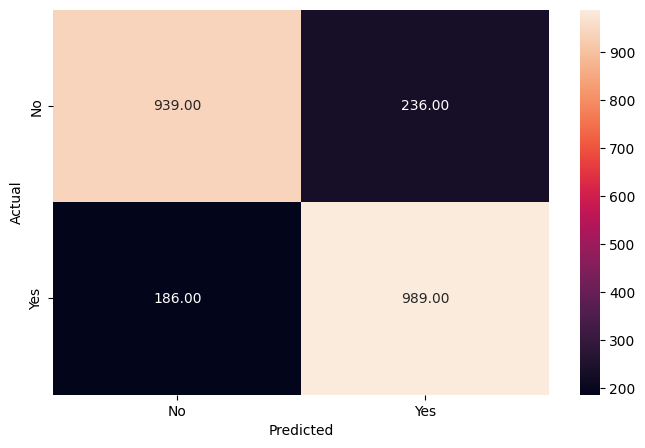

In [ ]:
#perfomace of tain data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Checking model performance (test)**

Check the model performance on the testing data. Use the metrics_score function built above.

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       504
           1       0.80      0.84      0.82       504

    accuracy                           0.82      1008
   macro avg       0.82      0.82      0.82      1008
weighted avg       0.82      0.82      0.82      1008



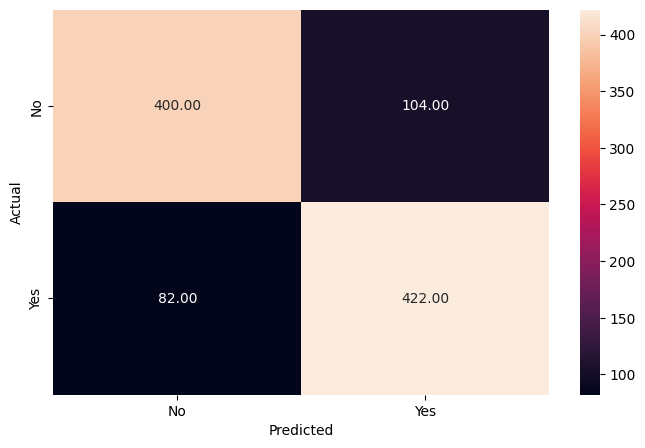

In [ ]:
# checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

In [ ]:
#printing the coefficients of logistic regression
cols=superstore.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Dt_days,0.871931
NumCatalogPurchases,0.707887
NumWebVisitsMonth,0.603226
Education_PhD,0.518541
MntMeatProducts,0.518406
Income,0.438103
NumWebPurchases,0.332499
NumDealsPurchases,0.316578
MntWines,0.303061
MntGoldProds,0.144539


**Finding Probability Thershold to improve model perfomace**

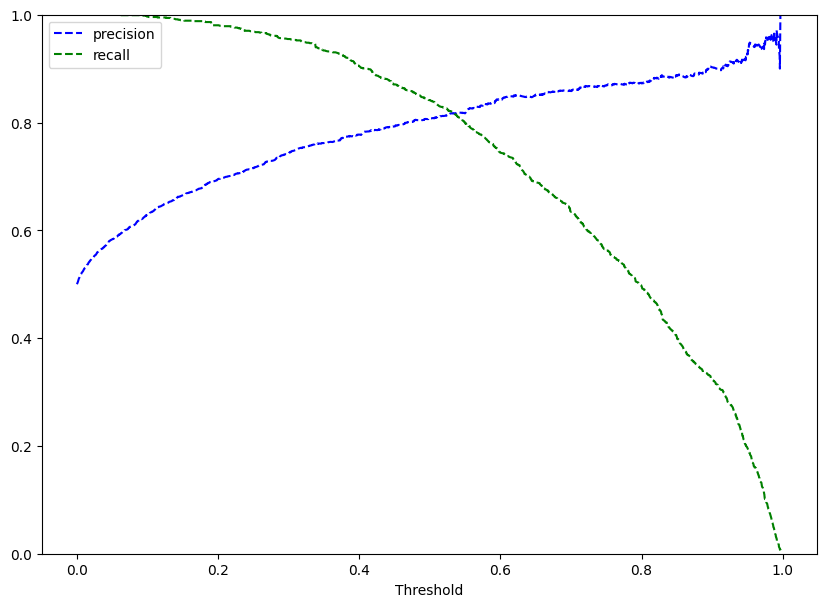

In [ ]:
y_scores_lg=lg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

from the above precision recall graph we could say that probability thershold is around 0.575. lets look the model using this probality thershold.

**On Training data**

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1175
           1       0.83      0.77      0.80      1175

    accuracy                           0.81      2350
   macro avg       0.81      0.81      0.81      2350
weighted avg       0.81      0.81      0.81      2350



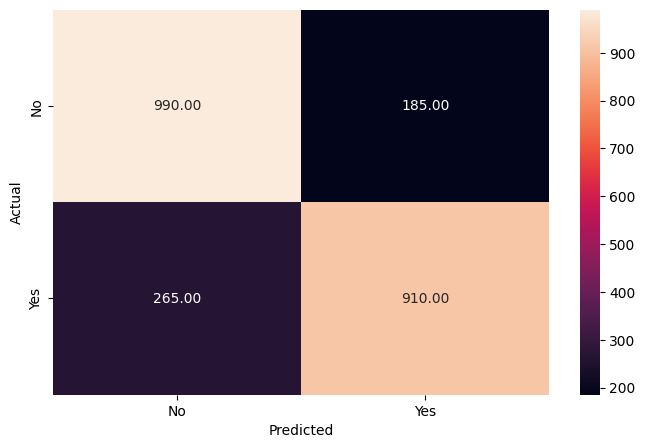

In [ ]:
optimal_threshold1=0.575
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

**On test data**

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       504
           1       0.82      0.78      0.80       504

    accuracy                           0.80      1008
   macro avg       0.80      0.80      0.80      1008
weighted avg       0.80      0.80      0.80      1008



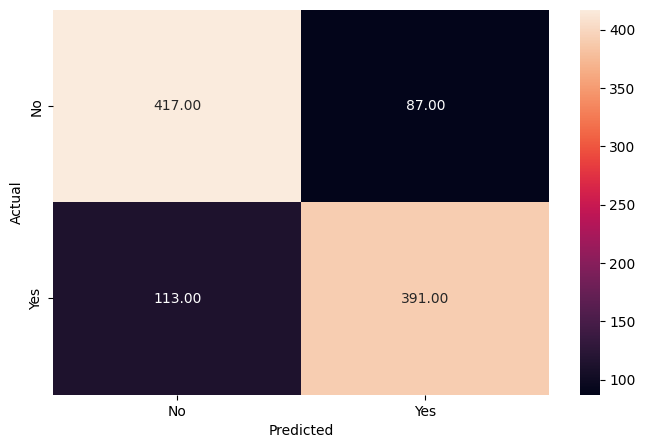

In [ ]:
optimal_threshold1=0.575
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

From the precision-recall graph the thershold value seems to be close to 0.3 but for our model we chose the thershold as 0.25 as the f1-score for both the thershold turned out to be same, but with thershold 0.25 we are able to achieve more recall and for our scenario having more recall would be ideal so that we wont loose on a potential premium member.

# Ensemble Model

In [ ]:

kfold = model_selection.KFold(n_splits=5,shuffle=True, random_state=0)

In [ ]:
y_pred_train.shape

(2350, 2)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1679
           1       0.88      0.95      0.91      1679

    accuracy                           0.91      3358
   macro avg       0.91      0.91      0.91      3358
weighted avg       0.91      0.91      0.91      3358



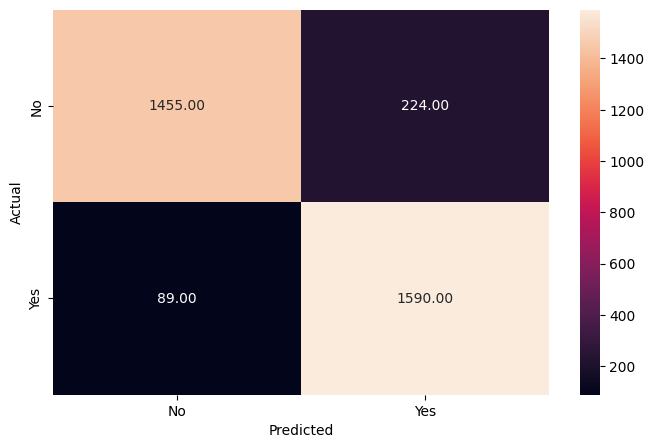

In [ ]:
# setting up testing and training sets


estimators = []
model1 =  LogisticRegression(); estimators.append(('logistic',model1))
model2 =  SVC(); estimators.append(('SVC',model2))
model3 =  KNN(n_neighbors=2); estimators.append(('KNN',model3))

ensemble = VotingClassifier(estimators)
y_sm = np.squeeze(y_sm)
y_pred_entrain = model_selection.cross_val_predict(ensemble,x_sm,y_sm,cv=kfold)

metrics_score(y_sm, y_pred_entrain)

#Feature Importance

In [ ]:
#Feature importance using premutation_importance method
result = permutation_importance(ensemble.fit(x_sm,y_sm),x_sm,y_sm)
result.importances_mean

array([0.01357951, 0.00726623, 0.05169744, 0.08731388, 0.01012507,
       0.0051221 , 0.02358547, 0.01816557, 0.00768314, 0.01232877,
       0.02555092, 0.01393687, 0.03924955, 0.07022037, 0.04276355,
       0.00357356, 0.01203097, 0.05223347, 0.01101846, 0.01167362,
       0.01197141, 0.03418702, 0.01387731, 0.01173317, 0.02471709,
       0.01226921])

In [ ]:
data=result.importances[result.importances_mean.argsort()].T
col= x_sm.columns[result.importances_mean.argsort()]

In [ ]:
# Sort the importances_mean array
sorted_importances = result.importances_mean[result.importances_mean.argsort()]
sorted_col = col[sorted_importances.argsort()]  # Sort column names accordingly


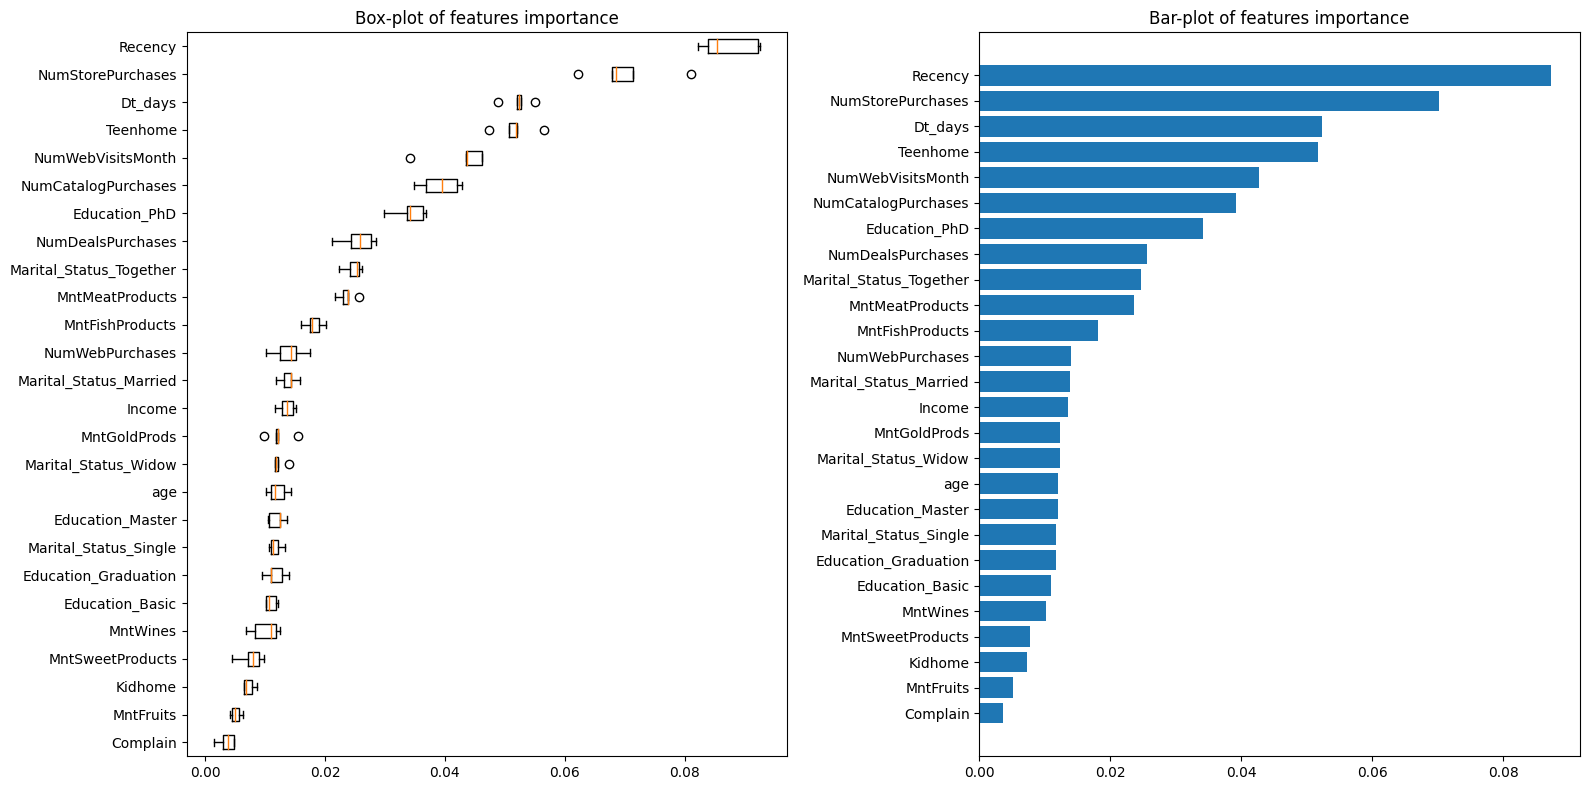

In [ ]:
plt.figure(figsize=(16,8))

# box plot of feature importance
plt.subplot(1,2,1)
plt.boxplot(data,  vert=False, labels=col)
plt.title('Box-plot of features importance')


#bar plot of feature importance
plt.subplot(1, 2, 2)
plt.barh(sorted_col, sorted_importances)  # Use sorted column names and importances
plt.title('Bar-plot of features importance')

#showing box plot
plt.tight_layout()
plt.show()

 **From the above graphs we could say that Recency, Number of store purchases and dt_days are the top 3 most effecting features.**